In [3]:
# Importación de librerias para el notebook
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
# Importación de las fuentes de datos
base = pd.read_csv('Input/base_de_datos.csv')
correlaciones = pd.read_csv('Input/correlaciones_precios.csv')
correlaciones_cantidad = pd.read_csv('Input/correlaciones_cantidad.csv')

In [5]:
# elimincación de prefijos para cada una de las variables
correlaciones.Producto1 = correlaciones.Producto1.map(lambda x: x.lstrip('precio_'))
correlaciones.Producto2 = correlaciones.Producto2.map(lambda x: x.lstrip('precio_'))
correlaciones_cantidad.Producto1 = correlaciones_cantidad.Producto1.map(lambda x: x.lstrip('cantidad_'))
correlaciones_cantidad.Producto2 = correlaciones_cantidad.Producto2.map(lambda x: x.lstrip('cantidad_'))

In [6]:
# Elimina filas de producto 1 que sean iguales a producto 2
correlaciones_cantidad = correlaciones_cantidad[correlaciones_cantidad.Producto1 != correlaciones_cantidad.Producto2]

In [7]:
correlaciones_cantidad

,Unnamed: 0,Producto1,Producto2,Correlacion
1,1,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-14:49:115:116,-0.039558
2,2,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-157:273:651:652,-0.091036
3,3,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-15:50:117:118,-0.023699
4,4,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-16:51:119:120,0.063767
5,5,BAQ-FRU1-CAT1-111:277:659:660,BAQ-FRU1-CAT1-19:52:121:122,0.090429
...,...,...,...,...
16852,16852,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:139:140,0.050023
16853,16853,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:239:240,0.508780
16854,16854,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-46:61:727:728,-0.081695
16855,16855,BAQ-FRU1-CAT6-82:276:657:658,BAQ-FRU1-CAT6-64:86:193:194,0.102866


In [8]:
# Construcción de una tabla con la lista de los productos con mayor valor en ventas
top_5 = pd.pivot_table(base, values="totalVentasConDescuento", index=['sku', 'producto'], aggfunc='sum').reset_index().sort_values('totalVentasConDescuento', ascending=False)
top_5 = list(top_5.sku[0:5])
top_5

['BAQ-FRU1-CAT2-346:464:1180:1181',
 'BAQ-FRU1-CAT6-64:86:193:194',
 'BAQ-FRU1-CAT1-47:67:151:152',
 'BAQ-FRU1-CAT104105-305509:1018259:1018260:563293',
 'BAQ-FRU1-CAT104105-60271:510131:510132:258690']

In [9]:
def strong_correlations(sku, _df1=correlaciones_cantidad, _df2 = correlaciones, top = top_5):
    temp_df1 = _df1[_df1.Producto1==sku]
    temp_df1 = temp_df1[~temp_df1.Producto2.isin(top)]
    temp_df1['abs'] = np.abs(temp_df1.Correlacion)
    temp_df1.sort_values('abs', ascending=False, inplace=True)
    temp_df1["Tipo"] = "Cantidad"
    temp_df1 = temp_df1[['Producto2','Correlacion', 'Tipo']][:10]

    temp_df2 = _df2[_df2.Producto1==sku]
    temp_df2 = temp_df2[~temp_df2.Producto2.isin(top)]
    temp_df2['abs'] = np.abs(temp_df2.Correlacion)
    temp_df2.sort_values('abs', ascending=False, inplace=True)
    temp_df2["Tipo"] = "Precio"
    temp_df2 = temp_df2[['Producto2','Correlacion','Tipo']][:10]

    frames = [temp_df1,temp_df2]
    frames = pd.concat(frames)

    return frames[frames.Producto2.duplicated()==False]

In [10]:
#Observemos por ejemplo las correlaciones en demanda y precio que tienen mayor correlación con el Ñame
strong_correlations("BAQ-FRU1-CAT2-346:464:1180:1181")

,Producto2,Correlacion,Tipo
11466,BAQ-FRU1-CAT6-283:371:966:967,0.768242,Cantidad
11370,BAQ-FRU1-CAT1-463:720:1869:1870,0.270433,Cantidad
11411,BAQ-FRU1-CAT104111-64:1114193:1114194:608238,-0.264985,Cantidad
11387,BAQ-FRU1-CAT104105-455075:1153677:1153676:630613,0.262296,Cantidad
11464,BAQ-FRU1-CAT6-234:304:750:770,0.213870,Cantidad
11426,BAQ-FRU1-CAT2-264:351:907:908,-0.207354,Cantidad
11382,BAQ-FRU1-CAT104105-154:296447:296448:160938,0.206079,Cantidad
11401,BAQ-FRU1-CAT104107-455422:1153682:1153683:630618,-0.184807,Cantidad
11355,BAQ-FRU1-CAT1-241:367:958:959,0.175464,Cantidad
11373,BAQ-FRU1-CAT1-52:78:177:178,-0.143985,Cantidad


In [11]:
def base_estudio(sku,_df=base):
    base_estudio = _df[_df.sku==sku]
    base_cantidad = pd.pivot_table(base_estudio, values="precio", index=['fecha'], aggfunc='mean').reset_index()
    base_precio = pd.pivot_table(base_estudio, values="cantidad", index=['fecha'], aggfunc='sum').reset_index()
    base_estudio = pd.merge(base_precio, base_cantidad, on='fecha', how='left')

    return base_estudio

def base_consolidada(sku):
    base_x = base_estudio(sku)
    str_corr = list(strong_correlations(sku).Producto2)

    for i in str_corr:
        base_i = base_estudio(i)
        base_i = base_i[['fecha','precio']]
        base_i.rename(columns={'precio':str(i)}, inplace=True)
        base_x = pd.merge(base_x,base_i, on="fecha", how='left')

    base_x.ffill(inplace=True)
    base_x.bfill(inplace=True)

    return base_x

In [12]:
base_prod = base_consolidada("BAQ-FRU1-CAT2-346:464:1180:1181")

In [13]:
base_prod.dropna()
base_prod

,fecha,cantidad,precio,BAQ-FRU1-CAT6-283:371:966:967,BAQ-FRU1-CAT1-463:720:1869:1870,BAQ-FRU1-CAT104111-64:1114193:1114194:608238,BAQ-FRU1-CAT104105-455075:1153677:1153676:630613,BAQ-FRU1-CAT6-234:304:750:770,BAQ-FRU1-CAT2-264:351:907:908,BAQ-FRU1-CAT104105-154:296447:296448:160938,BAQ-FRU1-CAT104107-455422:1153682:1153683:630618,BAQ-FRU1-CAT1-241:367:958:959,BAQ-FRU1-CAT1-52:78:177:178,BAQ-FRU1-CAT104107-456426:1155955:1155956:631850,BAQ-FRU1-CAT1-440:579:1507:1508,BAQ-FRU1-CAT1-15:50:117:118,BAQ-FRU1-CAT2-281:370:964:965,BAQ-FRU1-CAT6-298:790:2017:2018,BAQ-FRU1-CAT2-40061:70131:70132:47269
0,2022-07-30,11,70560.000000,2600.0,5050.0,4080.0,2500.000000,1286.770833,10000.0,4770.0,4300.0,7000.000000,12699.0,7150.0,31300.0,3101.000000,4310.0,3400.0,5820.0
1,2022-08-01,10,70560.000000,2600.0,5050.0,4080.0,2500.000000,1285.641975,10000.0,4770.0,4300.0,7000.000000,12699.0,7150.0,31300.0,3101.000000,4310.0,3400.0,5820.0
2,2022-08-02,17,69580.000000,2600.0,5050.0,4080.0,2500.000000,1219.777778,10000.0,4770.0,4300.0,7000.000000,12694.0,7150.0,31300.0,3101.000000,4310.0,3400.0,5500.0
3,2022-08-03,26,68867.272727,2600.0,5050.0,4080.0,2500.000000,1185.651685,10000.0,4770.0,4300.0,7000.000000,12689.0,7150.0,31300.0,3175.000000,4310.0,3400.0,5500.0
4,2022-08-04,33,66031.851852,2600.0,5050.0,4080.0,2500.000000,1180.750000,10000.0,4770.0,4300.0,7000.000000,13811.0,7150.0,31150.0,3397.000000,4310.0,3400.0,5510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2023-06-27,20,84649.774706,4500.0,5050.0,3800.0,2811.818182,2632.310345,10000.0,6170.0,2900.0,1250.000000,15100.0,6730.0,17290.0,1361.681250,3040.0,5020.0,9350.0
280,2023-06-28,22,84211.606316,4500.0,5050.0,3800.0,2779.285714,2632.310345,10000.0,6170.0,2900.0,1250.000000,15100.0,6730.0,17290.0,1391.750000,3040.0,5020.0,9350.0
281,2023-06-29,54,83576.787368,4500.0,5050.0,3800.0,2638.666667,2632.310345,10000.0,6170.0,2900.0,1233.500000,15100.0,6639.0,17290.0,1317.271020,3040.0,5020.0,9350.0
282,2023-06-30,22,83274.072778,4500.0,5050.0,4720.0,2440.344828,2632.310345,10000.0,6170.0,2900.0,1158.333333,15100.0,6626.0,17290.0,1296.819167,3320.0,5020.0,9350.0


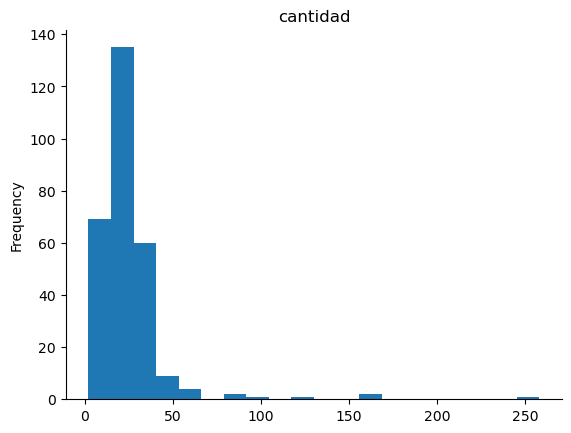

In [14]:
# Distribución de la variable objetivo (Cantidad)
from matplotlib import pyplot as plt
base_prod['cantidad'].plot(kind='hist', bins=20, title='cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

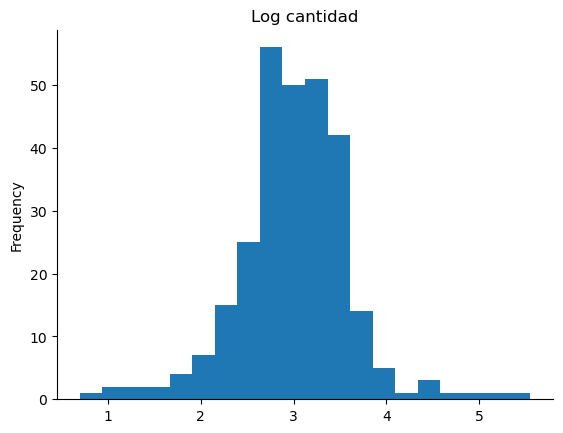

In [15]:
# Distribución de la variable objetivo (Log Cantidad)
from matplotlib import pyplot as plt
np.log(base_prod['cantidad']).plot(kind='hist', bins=20, title='Log cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\crama\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

<AxesSubplot:xlabel='fecha', ylabel='cantidad'>

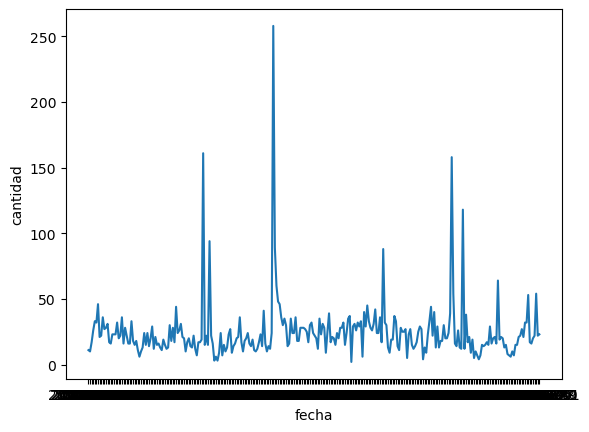

In [16]:
# Comportamiento de las cantidades vendidas durante el tiempo
sns.lineplot(data=base_prod, x="fecha", y="cantidad")

In [17]:
# correlaciones de la variable objetivo vs las demas variables de la tabla base
corr_name = base_prod.drop(columns="fecha").corr()
corr_name.cantidad

cantidad                                            1.000000
precio                                             -0.189511
BAQ-FRU1-CAT6-283:371:966:967                      -0.056429
BAQ-FRU1-CAT1-463:720:1869:1870                          NaN
BAQ-FRU1-CAT104111-64:1114193:1114194:608238       -0.038023
BAQ-FRU1-CAT104105-455075:1153677:1153676:630613   -0.073227
BAQ-FRU1-CAT6-234:304:750:770                       0.022021
BAQ-FRU1-CAT2-264:351:907:908                            NaN
BAQ-FRU1-CAT104105-154:296447:296448:160938        -0.067565
BAQ-FRU1-CAT104107-455422:1153682:1153683:630618    0.041011
BAQ-FRU1-CAT1-241:367:958:959                      -0.014362
BAQ-FRU1-CAT1-52:78:177:178                         0.005289
BAQ-FRU1-CAT104107-456426:1155955:1155956:631850   -0.031172
BAQ-FRU1-CAT1-440:579:1507:1508                     0.033655
BAQ-FRU1-CAT1-15:50:117:118                         0.050129
BAQ-FRU1-CAT2-281:370:964:965                       0.066156
BAQ-FRU1-CAT6-298:790:20

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Xdf = base_prod.drop(columns=['fecha', 'cantidad'])

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = Xdf.columns
vif_data["VIF"] = [variance_inflation_factor(Xdf.values, i) for i in range(len(Xdf.columns))]

vif_data

C:\Users\crama\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,Variable,VIF
0,precio,6.754818
1,BAQ-FRU1-CAT6-283:371:966:967,8.662869
2,BAQ-FRU1-CAT1-463:720:1869:1870,0.000000
3,BAQ-FRU1-CAT104111-64:1114193:1114194:608238,1.240184
4,BAQ-FRU1-CAT104105-455075:1153677:1153676:630613,6.575077
5,BAQ-FRU1-CAT6-234:304:750:770,3.141274
6,BAQ-FRU1-CAT2-264:351:907:908,0.000000
7,BAQ-FRU1-CAT104105-154:296447:296448:160938,1.797479
8,BAQ-FRU1-CAT104107-455422:1153682:1153683:630618,10.102429
9,BAQ-FRU1-CAT1-241:367:958:959,1.796658


In [19]:
# Listas de variables con un VIF inferior al 10
var_sel = list(vif_data.Variable[vif_data.VIF < 10])

In [20]:
var_sel

['precio',
 'BAQ-FRU1-CAT6-283:371:966:967',
 'BAQ-FRU1-CAT1-463:720:1869:1870',
 'BAQ-FRU1-CAT104111-64:1114193:1114194:608238',
 'BAQ-FRU1-CAT104105-455075:1153677:1153676:630613',
 'BAQ-FRU1-CAT6-234:304:750:770',
 'BAQ-FRU1-CAT2-264:351:907:908',
 'BAQ-FRU1-CAT104105-154:296447:296448:160938',
 'BAQ-FRU1-CAT1-241:367:958:959',
 'BAQ-FRU1-CAT1-52:78:177:178',
 'BAQ-FRU1-CAT104107-456426:1155955:1155956:631850',
 'BAQ-FRU1-CAT1-440:579:1507:1508',
 'BAQ-FRU1-CAT1-15:50:117:118',
 'BAQ-FRU1-CAT6-298:790:2017:2018',
 'BAQ-FRU1-CAT2-40061:70131:70132:47269']

In [21]:
#Definición de roles para el modelo
X = base_prod[var_sel].to_numpy()
y = np.log(base_prod.cantidad.to_numpy())

In [22]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (284, 15)
Shape of y: (284,)


# Modelado

Modelo para el producto

* **'BAQ-FRU1-CAT2-346:464:1180:1181' (Caja de Ajo)**
* 'BAQ-FRU1-CAT6-64:86:193:194'
* 'BAQ-FRU1-CAT1-47:67:151:152'
* 'BAQ-FRU1-CAT104105-305509:1018259:1018260:563293'
* 'BAQ-FRU1-CAT104105-60271:510131:510132:258690'


Se aplica el modelo LR stats

In [23]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Definir el número de folds para la validación cruzada
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Listas para almacenar los resultados de cada fold
mse_list = []
r2_list = []

# Realizar la validación cruzada
for train_index, test_index in kf.split(X):#_train):
    X_train_fold, X_val_fold = X[train_index], X[test_index]
    y_train_fold, y_val_fold = y[train_index], y[test_index]

    # Verificar las dimensiones antes de ajustar el modelo
    print("Shape of X_train_fold:", X_train_fold.shape)
    print("Shape of y_train_fold:", y_train_fold.shape)
    print("Shape of X_val_fold:", X_val_fold.shape)
    print("Shape of y_val_fold:", y_val_fold.shape)    

    # Ajustar el modelo en el fold de entrenamiento
    model = sm.OLS(y_train_fold, sm.add_constant(X_train_fold)).fit()

    # Realizar predicciones en el fold de validación
    y_pred_fold = model.predict(sm.add_constant(X_val_fold))

    # Calcular MSE y R2 en el fold de validación
    mse_fold = np.mean((y_pred_fold - y_val_fold)**2)
    r2_fold = model.rsquared

    # Almacenar los resultados
    mse_list.append(mse_fold)
    r2_list.append(r2_fold)

# Calcular el promedio de MSE y R2
summary = model.summary()
mse_6 = np.mean(mse_list)
r2_6 = np.mean(r2_list)

print(summary)
print("MSE promedio en validación cruzada:", mse_6)
print("R2 promedio en validación cruzada:", r2_6)


Shape of X_train_fold: (255, 15)
Shape of y_train_fold: (255,)
Shape of X_val_fold: (29, 15)
Shape of y_val_fold: (29,)
Shape of X_train_fold: (255, 15)
Shape of y_train_fold: (255,)
Shape of X_val_fold: (29, 15)
Shape of y_val_fold: (29,)
Shape of X_train_fold: (255, 15)
Shape of y_train_fold: (255,)
Shape of X_val_fold: (29, 15)
Shape of y_val_fold: (29,)
Shape of X_train_fold: (255, 15)
Shape of y_train_fold: (255,)
Shape of X_val_fold: (29, 15)
Shape of y_val_fold: (29,)
Shape of X_train_fold: (256, 15)
Shape of y_train_fold: (256,)
Shape of X_val_fold: (28, 15)
Shape of y_val_fold: (28,)
Shape of X_train_fold: (256, 15)
Shape of y_train_fold: (256,)
Shape of X_val_fold: (28, 15)
Shape of y_val_fold: (28,)
Shape of X_train_fold: (256, 15)
Shape of y_train_fold: (256,)
Shape of X_val_fold: (28, 15)
Shape of y_val_fold: (28,)
Shape of X_train_fold: (256, 15)
Shape of y_train_fold: (256,)
Shape of X_val_fold: (28, 15)
Shape of y_val_fold: (28,)
Shape of X_train_fold: (256, 15)
Shape o

In [24]:
pronostico = np.exp(model.predict(X))

In [25]:
pronostico

array([16.71364904, 16.71517791, 17.05060502, 17.47611481, 19.78125042,
       19.97200194, 29.71040618, 29.30092071, 28.8444953 , 28.10282073,
       24.27031535, 28.38838565, 25.49295994, 28.78636861, 34.67428567,
       24.94460376, 27.11289812, 26.30726033, 25.1179108 , 22.50676694,
       21.34845141, 21.54282106, 22.13378767, 23.49656338, 23.38519526,
       22.41454624, 20.60470645, 21.97514379, 21.49328044, 20.34711279,
       20.12751843, 20.12751843, 10.57141306,  9.614167  , 14.23696049,
       15.82546701, 21.2216018 , 21.22686421, 18.55632703, 20.39063898,
       17.89364401, 16.38312636, 18.69423655, 17.36538078, 15.69555559,
       16.66963128, 16.97284457, 16.69007968, 16.39341373, 16.36996844,
       16.18022419, 21.44253107, 21.47447277, 17.83766205, 19.61002137,
       22.87771411, 23.05861153, 23.05861153, 22.70685377, 22.08804457,
       20.88835118, 24.61467335, 24.43162957, 15.75332407, 15.0087706 ,
       14.82925588, 16.5615528 , 21.20952053, 20.68587324, 20.15

(array([ 1.,  4.,  4., 12.,  2.,  6., 10., 10., 17., 14., 16., 13., 16.,
        14., 12., 15., 14., 18., 17.,  9.,  9., 15., 12., 11.,  5.,  4.,
         1.,  0.,  1.,  2.]),
 array([ 7.75877357,  8.65595731,  9.55314105, 10.45032478, 11.34750852,
        12.24469226, 13.14187599, 14.03905973, 14.93624347, 15.8334272 ,
        16.73061094, 17.62779468, 18.52497841, 19.42216215, 20.31934589,
        21.21652962, 22.11371336, 23.0108971 , 23.90808083, 24.80526457,
        25.7024483 , 26.59963204, 27.49681578, 28.39399951, 29.29118325,
        30.18836699, 31.08555072, 31.98273446, 32.8799182 , 33.77710193,
        34.67428567]),
 <BarContainer object of 30 artists>)

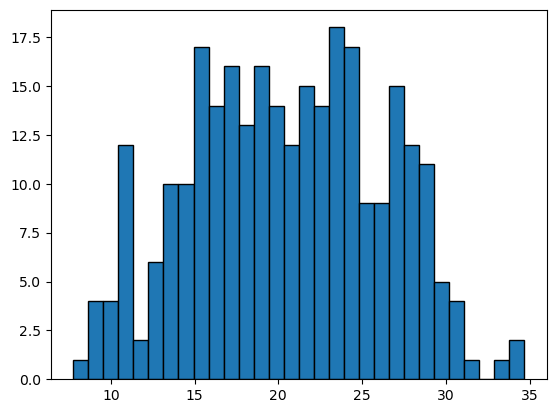

In [26]:
#pronostico.hist()
plt.hist(pronostico, bins=30, edgecolor='black')
#pronostico.plot(kind='hist', bins=20, title='cantidad')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [27]:
pronostico.shape

(284,)

# Guardado del modelo elegido

In [28]:
import pickle
# Guardar el modelo en pickle
with open('Output/ajo.pkl','wb')as f:
    pickle.dump(model ,f)
print("Modelo guardado en 'ajo.pkl'")

Modelo guardado en 'ajo.pkl'


In [29]:
# Cargar el modelo guardado desde el archivo
with open('Output/ajo.pkl', 'rb') as f:
    modelo_cargado = pickle.load(f)

# Verificar que el modelo cargado funcione correctamente
print("Parámetros del modelo cargado:", modelo_cargado.params)
print("Resumen del modelo cargado:\n", modelo_cargado.summary())

Parámetros del modelo cargado: [-4.35492620e-05 -1.57882624e-04  7.57348681e-04 -4.11666439e-04
  2.78325082e-05 -8.10289742e-05  1.49970036e-03 -2.47943468e-05
 -1.10567812e-04  2.85867840e-05 -1.65196013e-03  3.92855021e-05
 -1.21778684e-04  5.04830419e-05  8.75116449e-05]
Resumen del modelo cargado:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     6.339
Date:                Fri, 24 May 2024   Prob (F-statistic):           2.79e-10
Time:                        16:35:50   Log-Likelihood:                -198.54
No. Observations:                 256   AIC:                             425.1
Df Residuals:                     242   BIC:                             474.7
Df Model:                          13                          